In [1]:
from astropy.io import fits
import numpy as np
from astropy.convolution import convolve_fft, Gaussian2DKernel
import math
import astropy.units as u
import matplotlib.pyplot as plt
import astropy
import radio_beam
print(astropy.__version__)
%matplotlib notebook

3.2.1


In [2]:
rms = fits.open('/Users/hph/cmzoom_catalog/catalog_acc/CMZoom_noisemap_JySr_k14_final.fits')
region_mask = fits.open('/Users/hph/cmzoom_catalog/CMZoom_Mask_new.fits')
rms[0].data.shape

(2800, 19000)

In [3]:
fitspath='/Users/hph/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_pbcor/G0.714-0.100.continuum.pbcor.fits'
fitsbeam = radio_beam.Beam.from_fits_header(fitspath)  
indiv = fits.getdata(fitspath)
mosaic = fits.getdata('/Users/hph/cmzoom_catalog/catalog_acc/CMZoom_continuum_pbcor.fits')



In [4]:
#BMAJ=1.116964022319E-03    #20kmps                                             
#BMIN=4.534146851963E-04    #20kmps
#BMAJ=0.0009638905525208    #survey median
#BMIN=0.0008103334903717    #survey median
BMAJ=9.306523534987e-4 #SgrB2 SW                                                 
BMIN=7.843205663893e-4 #SgrB2 SW
#beam_ab_as2 = 3.25**2
beam_area_as2 = (BMAJ*BMIN*3600.**2)*(np.pi/(4*np.log(2)))
beam_area_deg2 = (BMAJ*BMIN)*(np.pi/(4*np.log(2)))
#beam_area_as2 = beam_ab_as2*np.pi/(4*np.log(2))
#beam_area_as2 = beam_ab_as2*np.pi/(2*np.sqrt(2))
#beam_area_deg2 = beam_area_as2/(3600.**2)
deg2_per_pix = (1.388888888889E-04)**2
beam_area_sr = beam_area_deg2/3282.8
pix_per_beam = beam_area_deg2/deg2_per_pix
print("Beam size in pixels: %2.0f"%pix_per_beam)
print("Beam area in steradians: %1.2e"%beam_area_sr)
conv=(1./beam_area_sr)/(1.0e9)
print(('The conversion from mJy/beam --> MJy/Sr: %1.2f ')%(conv))


Beam size in pixels: 43
Beam area in steradians: 2.52e-10
The conversion from mJy/beam --> MJy/Sr: 3.97 


In [22]:
BMAJ=9.306523534987e-4 #SgrB2 SW                                                 
BMIN=7.843205663893e-4 #SgrB2 SW
beam_area_sr=(BMAJ*u.deg*BMIN*u.deg*np.pi/(4*np.log(2))).to(u.sr)
print(((46.7*u.mJy)/(beam_area_sr)).to(u.MJy/u.sr))
beam = radio_beam.Beam(major=BMAJ,minor=BMIN)
print(beam.sr.value)
pixval_jypbm = 0.0205
print('A pixel of value %1.4f the pixel in Jy/sr should be %1.4e'\
      %(pixval_jypbm,pixval_jypbm/beam.sr.value))

185.3602651031429 MJy / sr
2.519418062658359e-10
A pixel of value 0.0205 the pixel in Jy/sr should be 8.1368e+07


In [5]:
deg2_per_pix = (1.3889E-04)**2
beam_area_deg2_max = ((bmaj_array*bmin_array).max())*(np.pi/(4*np.log(2)))
beam_area_deg2_min = ((bmaj_array*bmin_array).min())*(np.pi/(4*np.log(2)))
beam_area_deg2_med = (np.median((bmaj_array*bmin_array)))*(np.pi/(4*np.log(2)))
beam_area_sr_min = beam_area_deg2_min/3282.8
beam_area_sr_max = beam_area_deg2_max/3282.8
beam_area_sr_med = beam_area_deg2_med/3282.8
conv_min=(1./beam_area_sr_min)/(1.0e9)
conv_max=(1./beam_area_sr_max)/(1.0e9)
conv_med=(1./beam_area_sr_med)/(1.0e9)
pix_per_beam_min = beam_area_deg2_min/deg2_per_pix
pix_per_beam_max = beam_area_deg2_max/deg2_per_pix
pix_per_beam_med = beam_area_deg2_med/deg2_per_pix
print("Minimum beam size in pixels: %2.0f"%pix_per_beam_min)
print("Maximum beam size in pixels: %2.0f"%pix_per_beam_max)
print("Median beam size in pixels: %2.0f"%pix_per_beam_med)
print(('Minimum beam size conversion (multipy by flux in mJy/beam to get MJy/Sr): %1.2f ')%(conv_min))
print(('Maximum beam size conversion (multipy by flux in mJy/beam to get MJy/Sr): %1.2f ')%(conv_max))
print(('Median beam size conversion (multipy by flux in mJy/beam to get MJy/Sr): %1.2f ')%(conv_med))

NameError: name 'bmaj_array' is not defined

In [7]:
deg2_per_pix = (1.3889E-04)**2
beam_area_deg2_arr = ((bmaj_array*bmin_array))*(np.pi/(4*np.log(2)))
beam_area_sr_arr = beam_area_deg2_arr/3282.8
conv_arr=(1./beam_area_sr_arr)/(1.0e9)
pix_per_beam_arr = beam_area_deg2_arr/deg2_per_pix
plt.close()
plot,ax = plt.subplots((1),figsize=(5,5))
ax.hist(conv_arr,color='cornflowerblue')
ax.hist(conv_arr,histtype='step',color='k',lw=2)
ax.set_ylabel('Num of regions')
ax.set_xlabel('Conversion Factor from mJy/Beam to MJy/Sr')
plt.show()

NameError: name 'bmaj_array' is not defined

In [6]:
avg_array = np.zeros_like(np.arange(1,36))
median_array = np.zeros_like(np.arange(1,36))
for i in range(1,36):
    print(i)
    cond = region_mask[0].data==i
    avg_array[i-1] = np.nanmean(rms[0].data[cond])
    median_array[i-1] = np.nanmedian(rms[0].data[cond])
print(median_array[-1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
19035076


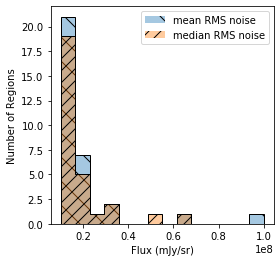

In [7]:
plt.rcParams['axes.facecolor'] = 'white'
fig,ax = plt.subplots(figsize=(4,4))

#conv=beam_area_sr*1000.
bins=np.logspace(6.6,8.3,15)
bins = 1e7*np.linspace(1,10,15)
#bins = bins*conv
# ax.hist(avg_array*conv,alpha=0.4,bins=bins,hatch='\ ', label='mean RMS noise')
# ax.hist(avg_array*conv,bins=bins,histtype='step',color='k')
ax.hist(avg_array,alpha=0.4,bins=bins,hatch='\ ', label='mean RMS noise')
ax.hist(avg_array,bins=bins,histtype='step',color='k')
#ax.set_xscale('log')
# ax.hist(median_array*conv,alpha=0.4,bins=bins,hatch='//',label='median RMS noise')
# ax.hist(median_array*conv,bins=bins,histtype='step',color='k')
ax.hist(median_array,alpha=0.4,bins=bins,hatch='//',label='median RMS noise')
ax.hist(median_array,bins=bins,histtype='step',color='k')
ax.set_xlabel('Flux (mJy/sr)')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [10]:
print(median_array.shape,len(reg_names))

NameError: name 'reg_names' is not defined

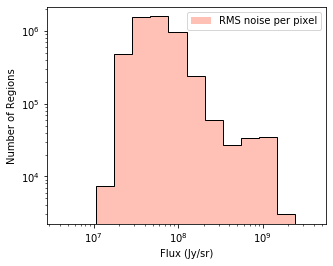

52720049.19533064


In [8]:
fig,ax = plt.subplots(figsize=(5,4))
bins=np.logspace(6.,9.,15)
bins=bins*conv
ax.set_xscale('log')
ax.hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=0.4,bins=bins,label='RMS noise per pixel',color='tomato')
ax.hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=1,bins=bins,color='k',histtype='step')
ax.set_xlabel('Flux (Jy/sr)')
ax.set_ylabel('Number of Regions')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()
print(np.median(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))]))

In [ ]:
print(np.histogram(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],bins=bins))


In [11]:
reg_names=['20kms_cloud.continuum.pbcor.fits',
'G0.001-0.058.continuum.pbcor.fits',
'G0.014+0.021.continuum.pbcor.fits',
'G0.054+0.027.continuum.pbcor.fits',
'G0.068-0.075.continuum.pbcor.fits',
'G0.070-0.035.continuum.pbcor.fits',
'G0.106-0.082.continuum.pbcor.fits',
'G0.145-0.086.continuum.pbcor.fits',
'G0.212-0.001.continuum.pbcor.fits',
'G0.253+0.016.continuum.pbcor.fits',
'G0.316-0.201.continuum.pbcor.fits',
'G0.326-0.085.continuum.pbcor.fits',
'G0.340+0.055.continuum.pbcor.fits',
'G0.380+0.050.continuum.pbcor.fits',
'G0.393-0.034.continuum.pbcor.fits',
'G0.412+0.052.continuum.pbcor.fits',
'G0.489+0.010.continuum.pbcor.fits',
'G0.619+0.012.continuum.pbcor.fits',
'G0.699-0.028.continuum.pbcor.fits',
'G0.714-0.100.continuum.pbcor.fits',
'G0.891-0.048.continuum.pbcor.fits',
'G1.038-0.074.continuum.pbcor.fits',
'G1.085-0.027.continuum.pbcor.fits',
'G1.602+0.018.continuum.pbcor.fits',
'G1.651-0.050.continuum.pbcor.fits',
'G1.670-0.130.continuum.pbcor.fits',
'G1.683-0.089.continuum.pbcor.fits',
'G359.137+0.031.continuum.pbcor.fits',
'G359.484-0.132.continuum.pbcor.fits',
'G359.611+0.018.continuum.pbcor.fits',
'G359.615-0.243.continuum.pbcor.fits',
'G359.648-0.133.continuum.pbcor.fits',
'G359.734+0.002.continuum.pbcor.fits',
'G359.865+0.022.continuum.pbcor.fits',
'G359.948-0.052.continuum.pbcor.fits']
print(len(reg_names))
      
      

35


In [12]:
bmin_array = np.zeros_like(reg_names,dtype='float')
bmaj_array = np.zeros_like(reg_names,dtype='float')
#path='/Users/hph/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_pbcor/'
path = '/Users/hph/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_pbcor/'
for i,name in enumerate(reg_names):
    hdu = fits.open(path+name)
    bmaj_array[i] = hdu[0].header['BMAJ']
    bmin_array[i] = hdu[0].header['BMIN']
    

In [13]:
for i in range(len(reg_names)):
    ap = conv*avg_array[i]
    bp = conv*median_array[i]
    cp = bmaj_array[i]*3600
    dp = bmin_array[i]*3600
    
    print(i+1, '\t', reg_names[i],'\t',"%.1f"%bp,'\t', "%.1f"%cp, '\t', "%.1f"%dp)

1 	 20kms_cloud.continuum.pbcor.fits 	 63998571.9 	 4.0 	 1.6
2 	 G0.001-0.058.continuum.pbcor.fits 	 55492179.6 	 4.2 	 1.7
3 	 G0.014+0.021.continuum.pbcor.fits 	 48665358.3 	 3.4 	 2.9
4 	 G0.054+0.027.continuum.pbcor.fits 	 30854541.7 	 3.6 	 3.0
5 	 G0.068-0.075.continuum.pbcor.fits 	 41680354.1 	 3.3 	 3.0
6 	 G0.070-0.035.continuum.pbcor.fits 	 62127726.9 	 4.2 	 2.9
7 	 G0.106-0.082.continuum.pbcor.fits 	 48957389.5 	 3.4 	 2.8
8 	 G0.145-0.086.continuum.pbcor.fits 	 69659737.4 	 3.4 	 2.9
9 	 G0.212-0.001.continuum.pbcor.fits 	 193309576.2 	 3.3 	 3.0
10 	 G0.253+0.016.continuum.pbcor.fits 	 34529010.1 	 4.3 	 3.0
11 	 G0.316-0.201.continuum.pbcor.fits 	 39594868.6 	 3.5 	 3.1
12 	 G0.326-0.085.continuum.pbcor.fits 	 42444910.1 	 3.1 	 3.0
13 	 G0.340+0.055.continuum.pbcor.fits 	 50630189.2 	 3.0 	 2.9
14 	 G0.380+0.050.continuum.pbcor.fits 	 54597236.5 	 3.0 	 2.9
15 	 G0.393-0.034.continuum.pbcor.fits 	 40716303.9 	 3.4 	 3.1
16 	 G0.412+0.052.continuum.pbcor.fits 	 51834484

In [14]:
for i in range(len(reg_names)):

    ap = conv*median_array[i]
    bp = bmaj_array[i]*3600
    cp = bmin_array[i]*3600
    print(i+1, '\t', reg_names[i],'\t', "%.2f"%ap,'\t',"%.2f"%bp,'\t', "%.2f"%cp)
#     print(reg_names[i],'\t',
#           conv*median_array[i],'\t',
#           bmaj_array[i]*3600,'\t',
#           bmin_array[i]*3600)

1 	 20kms_cloud.continuum.pbcor.fits 	 63998571.93 	 4.02 	 1.63
2 	 G0.001-0.058.continuum.pbcor.fits 	 55492179.58 	 4.17 	 1.66
3 	 G0.014+0.021.continuum.pbcor.fits 	 48665358.34 	 3.44 	 2.88
4 	 G0.054+0.027.continuum.pbcor.fits 	 30854541.68 	 3.57 	 2.98
5 	 G0.068-0.075.continuum.pbcor.fits 	 41680354.06 	 3.30 	 3.00
6 	 G0.070-0.035.continuum.pbcor.fits 	 62127726.85 	 4.23 	 2.92
7 	 G0.106-0.082.continuum.pbcor.fits 	 48957389.50 	 3.44 	 2.83
8 	 G0.145-0.086.continuum.pbcor.fits 	 69659737.35 	 3.35 	 2.87
9 	 G0.212-0.001.continuum.pbcor.fits 	 193309576.19 	 3.27 	 2.99
10 	 G0.253+0.016.continuum.pbcor.fits 	 34529010.10 	 4.31 	 2.98
11 	 G0.316-0.201.continuum.pbcor.fits 	 39594868.56 	 3.47 	 3.13
12 	 G0.326-0.085.continuum.pbcor.fits 	 42444910.09 	 3.11 	 2.97
13 	 G0.340+0.055.continuum.pbcor.fits 	 50630189.23 	 3.01 	 2.92
14 	 G0.380+0.050.continuum.pbcor.fits 	 54597236.55 	 3.00 	 2.95
15 	 G0.393-0.034.continuum.pbcor.fits 	 40716303.93 	 3.39 	 3.06
16 	

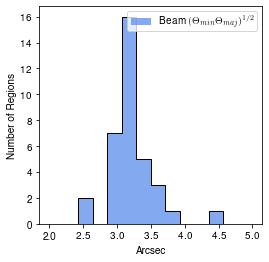

In [15]:
fig,ax = plt.subplots(figsize=(4,4))
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
bins=np.linspace(2,5,15)
beam_theta = ((bmaj_array*3600)*(bmin_array*3600))**0.5
ax.hist(beam_theta,alpha=0.8,bins=bins, 
        label='Beam $ (\Theta_{min} \Theta_{maj})^{1/2}$',color='cornflowerblue')
ax.hist(((bmaj_array*3600)*(bmin_array*3600))**0.5,bins=bins,histtype='step',color='k')
#ax.set_xscale('log')
ax.set_xlabel('Arcsec')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [16]:
print(np.min(beam_theta),np.max(beam_theta))
print(np.percentile(beam_theta,[25,75]))
print(np.median(beam_theta),np.mean(beam_theta))

2.561945483728625 4.382642777255319
[3.06731292 3.29815818]
3.1451616917291094 3.214830530862251


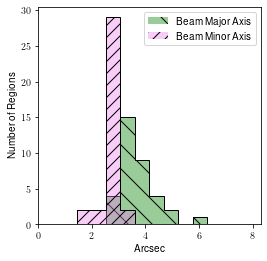

In [17]:
fig,ax = plt.subplots(figsize=(4,4))
bins=np.linspace(0.0001*3600,0.0022*3600,15)
ax.hist(bmaj_array*3600,alpha=0.4,bins=bins,hatch='\ ', label='Beam Major Axis',color='green')
ax.hist(bmaj_array*3600,bins=bins,histtype='step',color='k')
#ax.set_xscale('log')
ax.hist(bmin_array*3600,alpha=0.4,bins=bins,hatch='//',label='Beam Minor Axis',color='violet')
ax.hist(bmin_array*3600,bins=bins,histtype='step',color='k')
ax.set_xlabel('Arcsec')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [106]:
#print(np.min(bmin_array),np.max(bmin_array))
#print(np.min(bmaj_array),np.max(bmaj_array))
print(np.percentile(bmin_array*3600,[25,75]))
print(np.min(bmin_array)*3600,np.max(bmin_array)*3600)
print(np.percentile(bmaj_array*3600,[25,75]))
print(np.min(bmaj_array)*3600,np.max(bmaj_array)*3600)

[3.26765347 4.06791544]
2.99056768417368 6.2929320335388
[2.70823503 2.97743225]
1.63229286670668 3.13176035881044


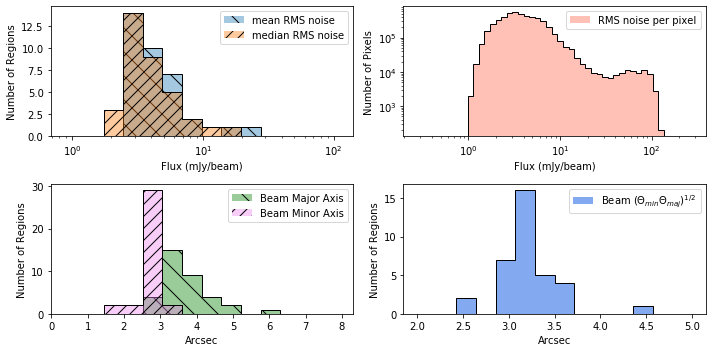

In [32]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
bins=np.logspace(6.5,8.6,15)
bins= bins*conv
axes[0][0].hist(conv*avg_array,alpha=0.4,bins=bins,hatch='\ ', label='mean RMS noise')
axes[0][0].hist(conv*avg_array,bins=bins,histtype='step',color='k')
axes[0][0].set_xscale('log')
axes[0][0].hist(conv*median_array,alpha=0.4,bins=bins,hatch='//',label='median RMS noise')
axes[0][0].hist(conv*median_array,bins=bins,histtype='step',color='k')
axes[0][0].set_xlabel('Flux (mJy/beam)')
axes[0][0].set_ylabel('Number of Regions')
axes[0][0].legend(loc='best')

bins=np.logspace(6.,9.,50)
bins=bins*conv
axes[0][1].set_xscale('log')
axes[0][1].hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=0.4,bins=bins,label='RMS noise per pixel',color='tomato')
axes[0][1].hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=1,bins=bins,color='k',histtype='step')
axes[0][1].set_xlabel('Flux (mJy/beam)')
axes[0][1].set_ylabel('Number of Pixels')
axes[0][1].set_yscale('log')
axes[0][1].legend(loc='best')

bins=np.linspace(0.0001*3600,0.0022*3600,15)
axes[1][0].hist(bmaj_array*3600,alpha=0.4,bins=bins,hatch='\ ', label='Beam Major Axis',color='green')
axes[1][0].hist(bmaj_array*3600,bins=bins,histtype='step',color='k')
#axes[1][0].set_xscale('log')
axes[1][0].hist(bmin_array*3600,alpha=0.4,bins=bins,hatch='//',label='Beam Minor Axis',color='violet')
axes[1][0].hist(bmin_array*3600,bins=bins,histtype='step',color='k')
axes[1][0].set_xlabel('Arcsec')
axes[1][0].set_ylabel('Number of Regions')
axes[1][0].legend(loc='best')

bins=np.linspace(2,5,15)
beam_theta = ((bmaj_array*3600)*(bmin_array*3600))**0.5
axes[1][1].hist(beam_theta,alpha=0.8,bins=bins, 
        label='Beam $ (\Theta_{min} \Theta_{maj})^{1/2}$',color='cornflowerblue')
axes[1][1].hist(((bmaj_array*3600)*(bmin_array*3600))**0.5,bins=bins,histtype='step',color='k')
#axes[1][1].set_xscale('log')
axes[1][1].set_xlabel('Arcsec')
axes[1][1].set_ylabel('Number of Regions')
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/hph/cmzoom_catalog/rms_fig.pdf')
plt.show()

In [79]:
hist_arr = []
conv=beam_area_sr*1000.
bins=np.logspace(6.,9.,100)
print(bins*conv)

for i in range(1,30):
    cond = region_mask[0].data==i
    temp_rms_data = rms[0].data[cond]
    hist_arr.append(np.histogram(temp_rms_data[np.logical_not(np.isnan(temp_rms_data))],bins=bins))

[  0.27575603   0.29568415   0.31705242   0.33996492   0.36453324
   0.39087704   0.41912464   0.44941362   0.48189149   0.51671645
   0.55405811   0.59409835   0.63703219   0.68306873   0.73243221
   0.78536306   0.84211906   0.90297667   0.96823228   1.03820374
   1.11323184   1.19368201   1.2799461    1.37244424   1.47162698
   1.57797737   1.69201341   1.81429052   1.94540426   2.08599322
   2.23674215   2.3983853    2.57170994   2.75756027   2.95684149
   3.17052421   3.39964919   3.64533239   3.90877044   4.19124642
   4.49413615   4.81891489   5.16716448   5.5405811    5.94098351
   6.37032188   6.83068735   7.32432215   7.85363056   8.42119062
   9.02976668   9.68232283  10.3820374   11.13231841  11.93682013
  12.79946096  13.72444245  14.71626978  15.77977371  16.92013412
  18.14290521  19.45404257  20.85993218  22.36742153  23.98385295
  25.71709938  27.57560271  29.56841491  31.70524212  33.99649189
  36.45332391  39.08770437  41.91246418  44.94136153  48.18914888
  51.67164

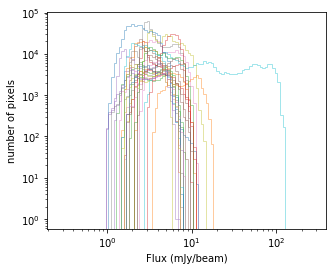

In [90]:
fig,ax = plt.subplots(figsize=(5,4))
ax.set_xscale('log')
for i in range(len(hist_arr)):
    cond = region_mask[0].data==i
    temp_rms_data = rms[0].data[cond]
    ax.hist(conv*temp_rms_data[np.logical_not(np.isnan(temp_rms_data))],bins=bins*conv,alpha=0.4,histtype='step')
ax.set_xlabel('Flux (mJy/beam)')
ax.set_ylabel('number of pixels')
ax.set_yscale('log')
#ax.legend(loc='best')
plt.show()

In [ ]:
# avg_array = np.zeros_like(np.arange(1,30))
# median_array = np.zeros_like(np.arange(1,30))
# for i in range(1,30):
#     cond = region_mask[0].data==i
#     avg_array[i-1] = np.nanmean(rms[0].data[cond])
#     median_array[i-1] = np.nanmedian(rms[0].data[cond])


In [9]:
reg_names=np.array(['G0.001-0.058.continuum_regrid.fits',
'G0.014+0.021.continuum_regrid.fits',
'G0.054+0.027.continuum_regrid.fits',
'G0.068-0.075.continuum_regrid.fits',
'G0.070-0.035.continuum_regrid.fits',
'G0.106-0.082.continuum_regrid.fits',
'G0.145-0.086.continuum_regrid.fits',
'G0.212-0.001.continuum_regrid.fits',
'G0.253+0.016.continuum_regrid.fits',
'G0.316-0.201.continuum_regrid.fits',
'G0.326-0.085.continuum_regrid.fits',
'G0.340+0.055.continuum_regrid.fits',
'G0.380+0.050.continuum_regrid.fits',
'G0.412+0.052.continuum_regrid.fits',
'G0.489+0.010.continuum_regrid.fits',
'G0.619+0.012.continuum_regrid.fits',
'G0.699-0.028.continuum_regrid.fits',
'G0.714-0.100.continuum_regrid.fits',
'G0.891-0.048.continuum_regrid.fits',
'G1.038-0.074.continuum_regrid.fits',
'G1.085-0.027.continuum_regrid.fits',
'G1.602+0.018.continuum_regrid.fits',
'G1.651-0.050.continuum_regrid.fits',
'G1.670-0.130.continuum_regrid.fits',
'G1.683-0.089.continuum_regrid.fits',
'G359.137+0.031.continuum_regrid.fits',
'G359.484-0.132.continuum_regrid.fits',
'G359.611+0.018.continuum_regrid.fits',
'G359.615-0.243.continuum_regrid.fits',
'G359.648-0.133.continuum_regrid.fits',
'G359.734+0.002.continuum_regrid.fits',
'G359.863-0.069.continuum_regrid.fits',
'G359.865+0.022.continuum_regrid.fits',
'G359.889-0.093.continuum_regrid.fits'])

# ,
# 'G359.948-0.052.continuum_regrid.fits'
# 'G0.393-0.034.continuum_regrid.fits',
# 'G1.127-0.106.continuum_regrid.fits',


In [18]:
# images = np.array(['G1.683-0.089.continuum.pbcor.fits','G1.670-0.130.continuum.pbcor.fits',\
#                       'G1.651-0.050.continuum.pbcor.fits','G1.602+0.018.continuum.pbcor.fits',\
#                       'G1.085-0.027.continuum.pbcor.fits',\
#                       'G1.038-0.074.continuum.pbcor.fits','G0.891-0.048.continuum.pbcor.fits',\
#                       'G0.714-0.100.continuum.pbcor.fits','G0.699-0.028.continuum.pbcor.fits',\
#                       'G0.619+0.012.continuum.pbcor.fits',\
#                       'G0.489+0.010.continuum.pbcor.fits','G0.412+0.052.continuum.pbcor.fits',\
#                       'G0.380+0.050.continuum.pbcor.fits',\
#                       'G0.340+0.055.continuum.pbcor.fits','G0.326-0.085.continuum.pbcor.fits',\
#                       'G0.316-0.201.continuum.pbcor.fits',\
#                       'G0.253+0.016.continuum.pbcor.fits',\
#                       'G0.212-0.001.continuum.pbcor.fits',\
#                       'G0.145-0.086.continuum.pbcor.fits',\
#                       'G0.106-0.082.continuum.pbcor.fits','G0.070-0.035.continuum.pbcor.fits',\
#                       'G0.068-0.075.continuum.pbcor.fits','G0.054+0.027.continuum.pbcor.fits',\
#                       'G0.014+0.021.continuum.pbcor.fits','G0.001-0.058.continuum.pbcor.fits',\
#                       'G359.889-0.093.continuum.pbcor.fits','G359.865+0.022.continuum.pbcor.fits',\
#                       'G359.863-0.069.continuum.pbcor.fits','G359.734+0.002.continuum.pbcor.fits',\
#                       'G359.648-0.133.continuum.pbcor.fits',\
#                       'G359.611+0.018.continuum.pbcor.fits',\
#                       'G359.615-0.243.continuum.pbcor.fits','G359.484-0.132.continuum.pbcor.fits',\
#                       'G359.137+0.031.continuum.pbcor.fits'])
images = np.array(['G1.683-0.089.continuum_regrid.fits','G1.670-0.130.continuum_regrid.fits',\
                      'G1.651-0.050.continuum_regrid.fits','G1.602+0.018.continuum_regrid.fits',\
                      'G1.085-0.027.continuum_regrid.fits',\
                      'G1.038-0.074.continuum_regrid.fits','G0.891-0.048.continuum_regrid.fits',\
                      'G0.714-0.100.continuum_regrid.fits','G0.699-0.028.continuum_regrid.fits',\
                      'G0.619+0.012.continuum_regrid.fits',\
                      'G0.489+0.010.continuum_regrid.fits','G0.412+0.052.continuum_regrid.fits',\
                      'G0.380+0.050.continuum_regrid.fits',\
                      'G0.340+0.055.continuum_regrid.fits','G0.326-0.085.continuum_regrid.fits',\
                      'G0.316-0.201.continuum_regrid.fits',\
                      'G0.253+0.016.continuum_regrid.fits',\
                      'G0.212-0.001.continuum_regrid.fits',\
                      'G0.145-0.086.continuum_regrid.fits',\
                      'G0.106-0.082.continuum_regrid.fits','G0.070-0.035.continuum_regrid.fits',\
                      'G0.068-0.075.continuum_regrid.fits','G0.054+0.027.continuum_regrid.fits',\
                      'G0.014+0.021.continuum_regrid.fits','G0.001-0.058.continuum_regrid.fits',\
                      'G359.889-0.093.continuum_regrid.fits','G359.865+0.022.continuum_regrid.fits',\
                      'G359.863-0.069.continuum_regrid.fits','G359.734+0.002.continuum_regrid.fits',\
                      'G359.648-0.133.continuum_regrid.fits',\
                      'G359.611+0.018.continuum_regrid.fits',\
                      'G359.615-0.243.continuum_regrid.fits','G359.484-0.132.continuum_regrid.fits',\
                      'G359.137+0.031.continuum_regrid.fits'])

In [11]:
print(len(reg_names),len(images))
for i in range(len(images)):
    print(images[i],'\t',reg_names[i])
    
missing1 = np.argwhere(np.logical_not(np.isin(images,reg_names))).T
missing2 = np.argwhere(np.logical_not(np.isin(reg_names,images))).T
print(missing1[0], missing2[0])
#print(images[missing1[0][0]],images[missing1[0][1]])
print(reg_names[missing2])

34 34
G1.683-0.089.continuum_regrid.fits 	 G0.001-0.058.continuum_regrid.fits
G1.670-0.130.continuum_regrid.fits 	 G0.014+0.021.continuum_regrid.fits
G1.651-0.050.continuum_regrid.fits 	 G0.054+0.027.continuum_regrid.fits
G1.602+0.018.continuum_regrid.fits 	 G0.068-0.075.continuum_regrid.fits
G1.085-0.027.continuum_regrid.fits 	 G0.070-0.035.continuum_regrid.fits
G1.038-0.074.continuum_regrid.fits 	 G0.106-0.082.continuum_regrid.fits
G0.891-0.048.continuum_regrid.fits 	 G0.145-0.086.continuum_regrid.fits
G0.714-0.100.continuum_regrid.fits 	 G0.212-0.001.continuum_regrid.fits
G0.699-0.028.continuum_regrid.fits 	 G0.253+0.016.continuum_regrid.fits
G0.619+0.012.continuum_regrid.fits 	 G0.316-0.201.continuum_regrid.fits
G0.489+0.010.continuum_regrid.fits 	 G0.326-0.085.continuum_regrid.fits
G0.412+0.052.continuum_regrid.fits 	 G0.340+0.055.continuum_regrid.fits
G0.380+0.050.continuum_regrid.fits 	 G0.380+0.050.continuum_regrid.fits
G0.340+0.055.continuum_regrid.fits 	 G0.412+0.052.continuu

array(['G1.683-0.089.continuum.pbcor.fits',
       'G1.670-0.130.continuum.pbcor.fits',
       'G1.651-0.050.continuum.pbcor.fits',
       'G1.602+0.018.continuum.pbcor.fits',
       'G1.085-0.027.continuum.pbcor.fits',
       'G1.038-0.074.continuum.pbcor.fits',
       'G0.891-0.048.continuum.pbcor.fits',
       'G0.714-0.100.continuum.pbcor.fits',
       'G0.699-0.028.continuum.pbcor.fits',
       'G0.619+0.012.continuum.pbcor.fits',
       'G0.489+0.010.continuum.pbcor.fits',
       'G0.412+0.052.continuum.pbcor.fits',
       'G0.380+0.050.continuum.pbcor.fits',
       'G0.340+0.055.continuum.pbcor.fits',
       'G0.326-0.085.continuum.pbcor.fits',
       'G0.316-0.201.continuum.pbcor.fits',
       'G0.253+0.016.continuum.pbcor.fits',
       'G0.212-0.001.continuum.pbcor.fits',
       'G0.145-0.086.continuum.pbcor.fits',
       'G0.106-0.082.continuum.pbcor.fits',
       'G0.070-0.035.continuum.pbcor.fits',
       'G0.068-0.075.continuum.pbcor.fits',
       'G0.054+0.027.continuum.p

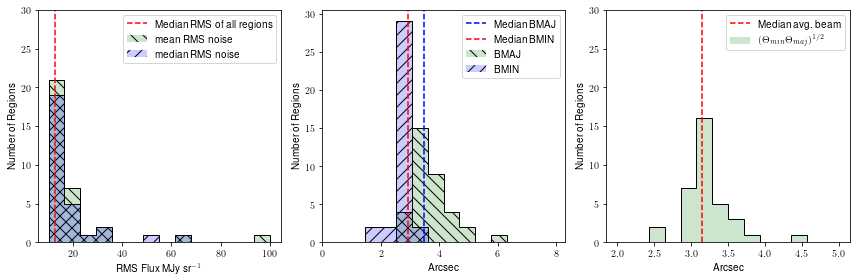

In [23]:
############################################################
### new version of multi panel figure for overview paper
############################################################

fig,axes = plt.subplots(1,3,figsize=(12,4))
bins=np.logspace(6.6,8.3,15)
bins = 1e7*np.linspace(1,10,15)/1e6
ax = axes[0]
ax.hist(avg_array/1e6,alpha=0.2,bins=bins,hatch='\\\\', label='mean RMS noise',color='green')
ax.hist(avg_array/1e6,bins=bins,histtype='step',color='k')
ax.hist(median_array/1e6,alpha=0.2,bins=bins,hatch='//',label='median RMS noise',color='blue')
ax.hist(median_array/1e6,bins=bins,histtype='step',color='k')
ax.set_xlabel('RMS Flux MJy sr$^{-1}$ ')
ax.set_ylabel('Number of Regions')
ax.plot([np.median(median_array/1e6),np.median(median_array/1e6)],[0,30],
        color='red',ls ='--',label='Median RMS of all regions')
ax.set_ylim(0,30)
#ax12 = ax.twiny()
#ticks = ax.get_xticks()            # Get locations and labels
#ticks = np.array([0.,5.6,11.3,16.9,22.5,28.1,33.8])
#ax12.set_xticks(ticks)  # Set locations and labels
#ax12.set_xlabel('RMS Flux mJy Beam$^{-1}$')
ax.legend(loc='best')

bins=np.linspace(0.0001*3600,0.0022*3600,15)
axes[1].hist(bmaj_array*3600,alpha=0.2,bins=bins,hatch='\\\\', label='BMAJ',color='green')
axes[1].hist(bmaj_array*3600,bins=bins,histtype='step',color='k')
axes[1].hist(bmin_array*3600,alpha=0.2,bins=bins,hatch='//',label='BMIN',color='blue')
axes[1].plot([np.median(bmaj_array*3600),np.median(bmaj_array*3600)],[0,40],
             color='blue',ls ='--',label = 'Median BMAJ')
axes[1].plot([np.median(bmin_array*3600),np.median(bmin_array*3600)],[0,40],
             color='red',ls ='--',label = 'Median BMIN')
axes[1].hist(bmin_array*3600,bins=bins,histtype='step',color='k')
axes[1].set_xlabel('Arcsec')
axes[1].set_ylim(0,30.5)
axes[1].set_ylabel('Number of Regions')
axes[1].legend(loc='best')

bins=np.linspace(2,5,15)
beam_theta = ((bmaj_array*3600)*(bmin_array*3600))**0.5
axes[2].hist(beam_theta,alpha=0.2,bins=bins, 
        label='$ (\Theta_{min} \Theta_{maj})^{1/2}$',color='green')
axes[2].hist(beam_theta,bins=bins,histtype='step',color='k')
axes[2].plot([np.median(beam_theta),np.median(beam_theta)],[0,30],
             color='red',ls ='--',label = 'Median avg. beam')
axes[2].set_xlabel('Arcsec')
axes[2].set_ylabel('Number of Regions')
axes[2].legend(loc='best')
axes[2].set_ylim(0,30)
plt.tight_layout()
plt.savefig('/Users/hph/cmzoom_catalog/rms_fig.pdf',overwrite=True)
plt.show()


In [21]:
print(np.median(bmaj_array),np.median(bmin_array))

0.0009638905525208 0.0008103334903717


In [24]:
print(np.median(median_array)/1e6, np.mean())

12.652141


In [25]:
print(np.min(median_array)/1e6,np.max(median_array)/1e6)
print(np.percentile(median_array/1e6,[25,75]))
print(np.median(median_array/1e6),np.mean(median_array/1e6))

7.773564 63.722428
[10.6402775 18.292655 ]
12.652141 16.669363485714285
